In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
plt.style.use('publication')

In [2]:
comp_time = 0.005
exp_rate = 0.2
num_workers = 1000
num_trials = 100
num_rep = 2 #Changing to 4 makes Rep beat 1

In [3]:
# lt_decthresh = {'LT-1':np.load('encnum_1000.npy'),'LT-2':np.load('encnum_500.npy')}
# lt_degrees = {'LT-1':np.load('degrees_1000.npy'),'LT-1':2*np.load('degrees_500.npy')}

In [4]:
keys_list = ['One','Unc', 'Rep', 'LT-1', 'LT-2']

In [5]:
colors = {'One':'Black','Unc':'Orange','Rep':'Gold','LT-1':'Blue','LT-2':'Green'}
linestyles = {'One':'-','Unc':'--','Rep':'-.','LT-1':'--','LT-2':'-'}
markers = {'One':'s','Unc':'p','Rep':'8','LT-1':'>','LT-2':'o'}

In [6]:
latency_dict = {'One':[],'Unc':[],'Rep':[],'LT-1':[],'LT-2':[]}

In [7]:
for trial in range(num_trials):
    setup_times = np.random.exponential(scale=1/exp_rate,size=num_workers)
    latency_dict['One'].append(setup_times[0]+num_workers*comp_time)
    latency_dict['Unc'].append(setup_times.max()+comp_time)
    latency_dict['Rep'].append(get_rep_time(setup_times+num_rep*comp_time,num_rep))
# latency_dict['LT-1'] = np.load('lt_exp_1000.npy').tolist()
# latency_dict['LT-2'] = np.load('lt_exp_500.npy').tolist()

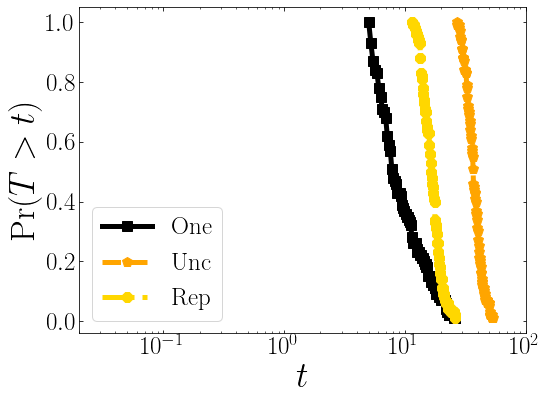

In [8]:
latency_tails = {}
plt.figure()
for key in keys_list:
    if len(latency_dict[key])>0:
        tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
        plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
plt.xscale('log')
plt.xlabel('$t$')
plt.xlim([0.02,100])
plt.ylabel('$\Pr(T>t)$')
plt.legend(loc='lower left')
plt.savefig('Plot_ppt_4.pdf')
plt.show()

In [9]:
latency_dict = {'One':[],'Unc':[],'Rep':[],'LT-1':[],'LT-2':[]}

In [10]:
for trial in range(num_trials):
    setup_times = 1.0+np.random.pareto(a=1,size=num_workers)
    latency_dict['One'].append(setup_times[0]+num_workers*comp_time)
    latency_dict['Unc'].append(setup_times.max()+comp_time)
    latency_dict['Rep'].append(get_rep_time(setup_times+num_rep*comp_time,num_rep))
latency_dict['LT-1'] = np.load('lt_par_1000.npy').tolist()
# latency_dict['LT-2'] = np.load('lt_par_500.npy').tolist()

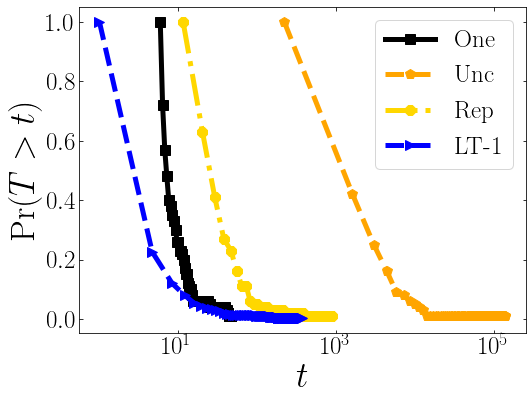

In [11]:
latency_tails = {}
plt.figure()
for key in keys_list:
    if len(latency_dict[key])>0:
        tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
        plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
plt.xscale('log')
plt.xlabel('$t$')
# plt.xlim([0.02,100])
plt.ylabel('$\Pr(T>t)$')
plt.legend(loc='upper right')
plt.savefig('Plot_ppt_4.pdf')
plt.show()

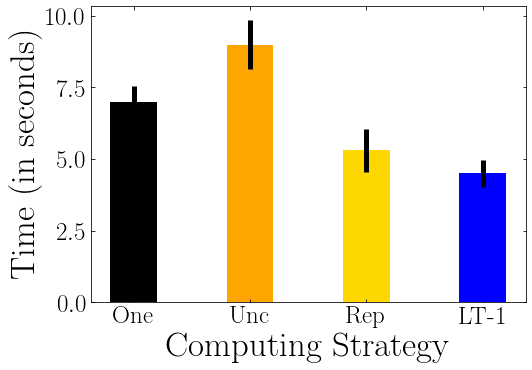

In [12]:
#Lambda Plots
plt.figure()
pos_list = [0, 2, 4, 6]
time_list = [7, 9, 5.3, 4.5]
err_list = [0.56, 0.84, 0.74, 0.46]
for (ctr,key) in enumerate(keys_list):
    if len(latency_dict[key])>0:
        plt.bar(pos_list[ctr], time_list[ctr], yerr = err_list[ctr], color=colors[key])
plt.xticks(ticks = pos_list, labels = ['One', 'Unc', 'Rep', 'LT-1'])
plt.xlabel('Computing Strategy')
plt.ylabel('Time (in seconds)')
plt.tight_layout()
plt.savefig('Plot_ppt_5.pdf')
plt.show()

In [13]:
# latency_tails = {}
# plt.figure()
# for key in latency_dict:
#     if len(latency_dict[key])>0:
#         tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
#         plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
# plt.xscale('log')
# plt.xlabel('$t$')
# plt.ylabel('$\Pr(T>t)$')
# plt.legend()
# plt.savefig('Plot1_latency_exp.pdf')
# plt.show()

In [14]:
# latency_dict = {'One':[],'Unc':[],'Rep':[],'LT-1':[],'LT-2':[]}

In [15]:
# for trial in range(num_trials):
#     setup_times = 1.0+np.random.pareto(a=1,size=num_workers)
#     latency_dict['One'].append(setup_times[0]+num_workers*comp_time)
#     latency_dict['Unc'].append(setup_times.max()+comp_time)
#     latency_dict['Rep'].append(get_rep_time(setup_times+num_rep*comp_time,num_rep))
# latency_dict['LT-1'] = np.load('lt_par_1000.npy').tolist()
# latency_dict['LT-2'] = np.load('lt_par_500.npy').tolist()

In [16]:
# latency_tails = {}
# plt.figure()
# for key in latency_dict:
#     if len(latency_dict[key])>0:
#         tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
#         plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
# plt.xscale('log')
# plt.xlabel('$t$')
# plt.ylabel('$\Pr(T>t)$')
# plt.legend()
# plt.savefig('Plot2_latency_par.pdf')
# plt.show()

In [17]:
# 1.0+np.random.pareto(a=1,size=num_workers)